<h2><center>Applied Machine Learning - Assignment 8</center></h2>
<h4><center>Lorenzo Cirac Monteagduo</center></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Recommender Datasets:</h3>
<p>You can use any of the datasets (or optionally, both datasets)</p>
<ol>
    <li>Movielens 100k dataset $D_1$: Rating prediction dataset (rating scale 1-5)</li>
    <li>Wine Quality dataset $D_2$ (use winequality-red.csv)</li>
</ol>

<h3>Question 1 - Recommender Dataset</h3>
<p>Perform a statistical analysis of the two datasets provided. Your analysis should extract as much
useful information as possible. You must use all the related information of users and movies
for the analysis, such as ratings, user attributes (age group, zipcode, etc.), and item attributes
(genre, title, release date, etc.). The grading of this task depends on the useful information
extracted from the datasets, which can aid in the learning process. Use tables and graphs to
represent your findings.</p>

<h4>Solution: $D_1$ (Movielens 100k dataset)</h4>

In [2]:
u_data = pd.read_csv('res/u.data', sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

u_user = pd.read_csv('res/u.user', sep = '|', names = ['user_id', 'age', 'gender', 'occupation', 'zip_code'])

u_info = pd.read_csv('res/u.item', sep = '|', encoding = 'latin-1', header = None, names = ['movie_id', 'movie_title',
                    'release_date', 'video_release_data', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
                    "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

<p>To gain insight into the ratings in our dataset, it's essential to first examine the users:</p>

<h4>User Analysis</h4>

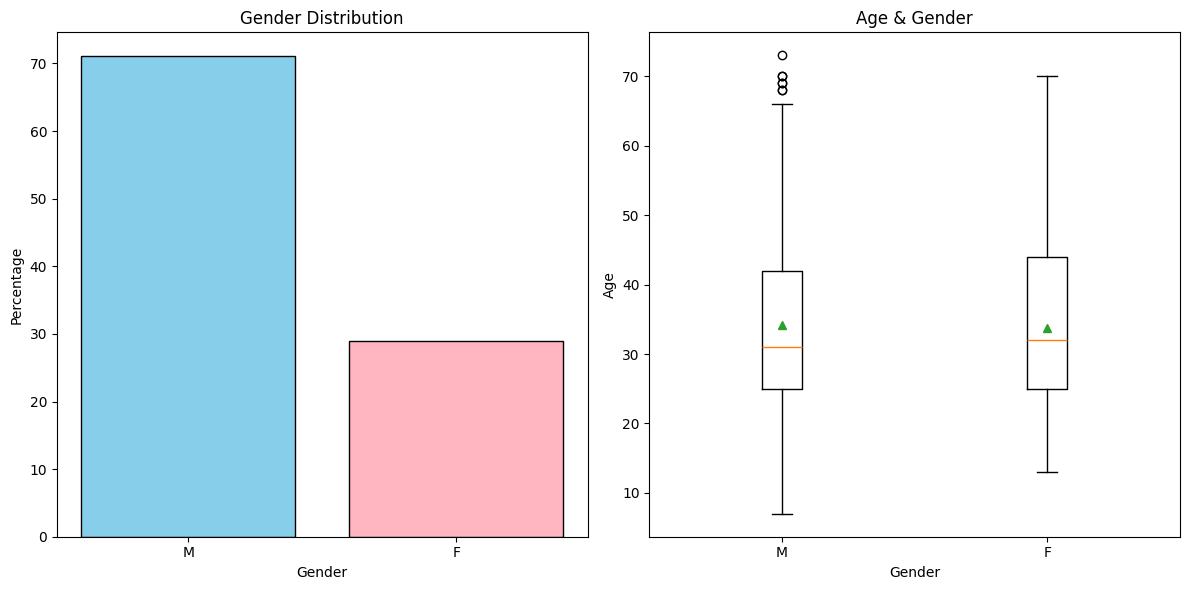

In [3]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

# Gender Distribution
gender_counts = u_user['gender'].value_counts(normalize = True).multiply(100).reset_index()
gender_counts.columns = ['Gender', 'Percentage'] 
axes[0].bar(gender_counts['Gender'], gender_counts['Percentage'], color = ['skyblue', 'lightpink'], edgecolor = 'black')
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Percentage')

# Age & Gender Boxplot
m_ages = u_user[u_user['gender'] == 'M']['age']
f_ages = u_user[u_user['gender'] == 'F']['age']
axes[1].boxplot([m_ages, f_ages], showmeans = True)
axes[1].set_title('Age & Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')
axes[1].set_xticklabels(['M', 'F'])

plt.tight_layout()
plt.show()

<p>The gender distribution shows a clear imbalance, with males (M) comprising ~ 70 % of the dataset and females (F) making up ~ 30 %. This significant difference may introduce gender-related biases into the model's predictions, as the data is skewed toward male users.</p>

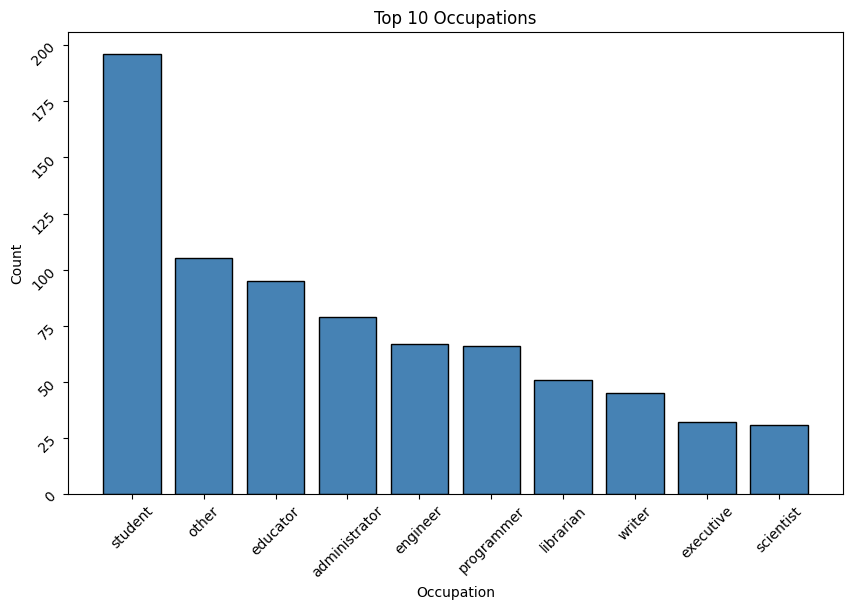

In [4]:
# Top 10 Occupancies
top_10_occupations = u_user['occupation'].value_counts().head(10)
plt.figure(figsize = (10, 6))
plt.bar(top_10_occupations.index, top_10_occupations.values, color = 'steelblue', edgecolor = 'black')
plt.title('Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.tick_params(rotation = 45)
plt.show()

<p>The dataset is heavily influenced by student users, which could skew the ratings and preferences reflected in the model. The significantly lower counts for occupations such as executive, scientist, and writer suggest that the sample is predominantly representative of a younger or more academic demographic. This occupational imbalance should be taken into account when analyzing the data</p>

<h4>Rating Analysis</h4>

In [5]:
merged_data = pd.merge(u_data, u_user, on = 'user_id')
full_data = pd.merge(merged_data, u_info, left_on = 'item_id', right_on = 'movie_id')
full_data = full_data.drop(columns = ['item_id'])
full_data.head()

,user_id,rating,timestamp,age,gender,occupation,zip_code,movie_id,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,3,881250949,49,M,writer,55105,242,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,3,891717742,39,F,executive,00000,302,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,1,878887116,25,M,writer,40206,377,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,2,880606923,28,M,technician,80525,51,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,1,886397596,47,M,educator,55113,346,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


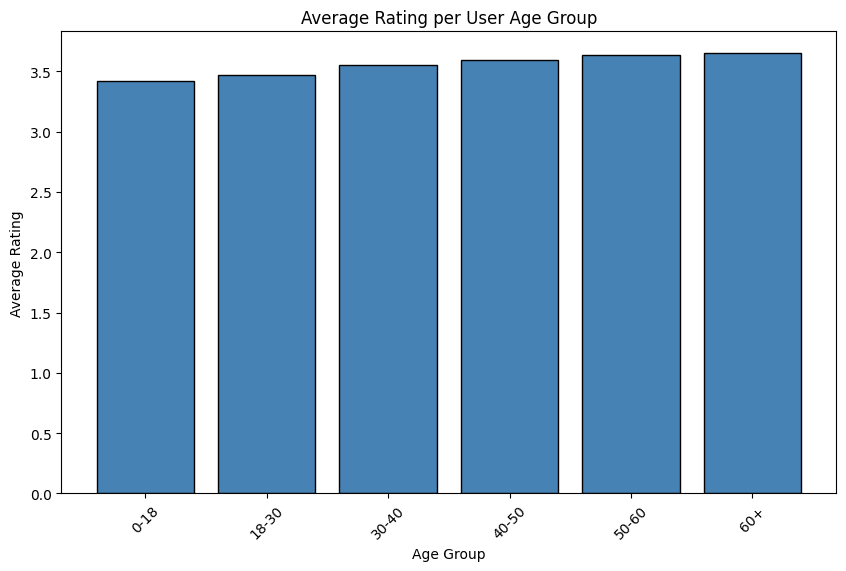

In [6]:
# Average Rating per User Age Group
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60+']
full_data['age_group'] = pd.cut(full_data['age'], bins = age_bins, labels = age_labels, right = False)
average_rating_per_age_group = full_data.groupby('age_group', observed = False)['rating'].mean()
plt.figure(figsize = (10,6))
plt.bar(average_rating_per_age_group.index, average_rating_per_age_group.values, color = 'steelblue', edgecolor = 'black')
plt.title('Average Rating per User Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.xticks(rotation = 45)
plt.show()

<p>The data shows a slight positive correlation between age and average rating. As the age group increases, so does the average rating.</p>

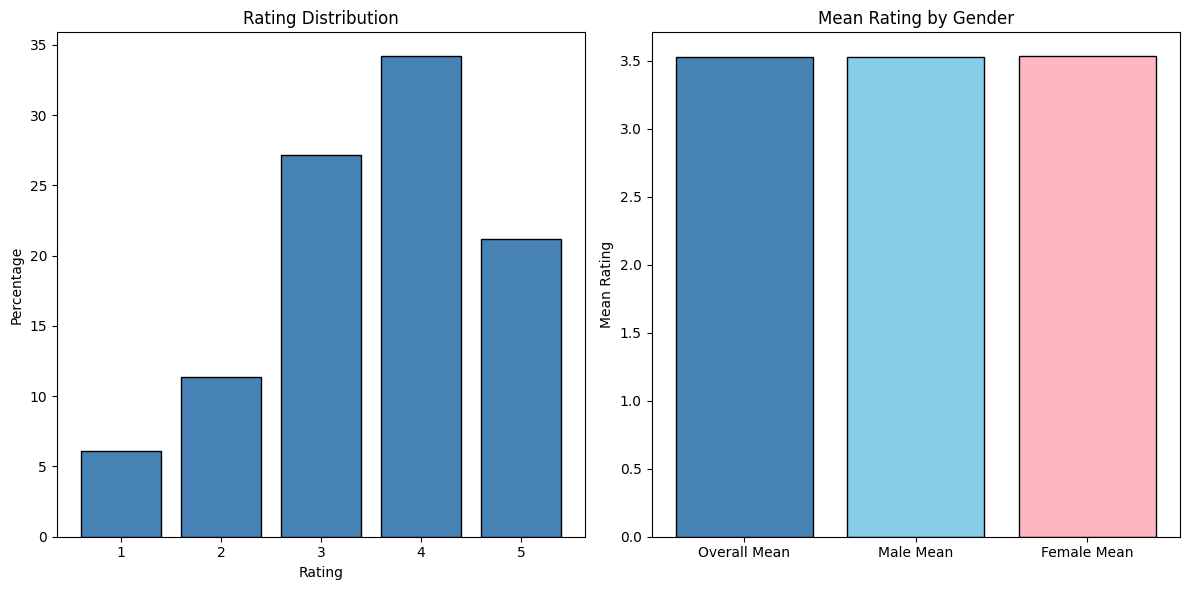

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

# Rating Distribution
rating_counts = u_data['rating'].value_counts(normalize = True).multiply(100).reset_index()
rating_counts.columns = ['Rating', 'Percentage'] 
axes[0].bar(rating_counts['Rating'], rating_counts['Percentage'], color = 'steelblue', edgecolor = 'black')
axes[0].set_title('Rating Distribution')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Percentage')

# Mean Rating & Gender Rating Mean
rating_mean = full_data['rating'].mean()
rating_by_gender = full_data.groupby('gender')['rating'].mean()
axes[1].bar(['Overall Mean', 'Male Mean', 'Female Mean'], 
            [rating_mean, rating_by_gender.get('M', 0), rating_by_gender.get('F', 0)], 
            color = ['steelblue', 'skyblue', 'lightpink'], edgecolor = 'black')

axes[1].set_title('Mean Rating by Gender')
axes[1].set_ylabel('Mean Rating')

plt.tight_layout()
plt.show()

<p>The data shows a tendency toward higher ratings overall, and there is no notable difference in the mean ratings between male and female users. This can help to ensure that the model does not overfit based on gender biases, as the ratings are fairly balanced between the two groups.</p>

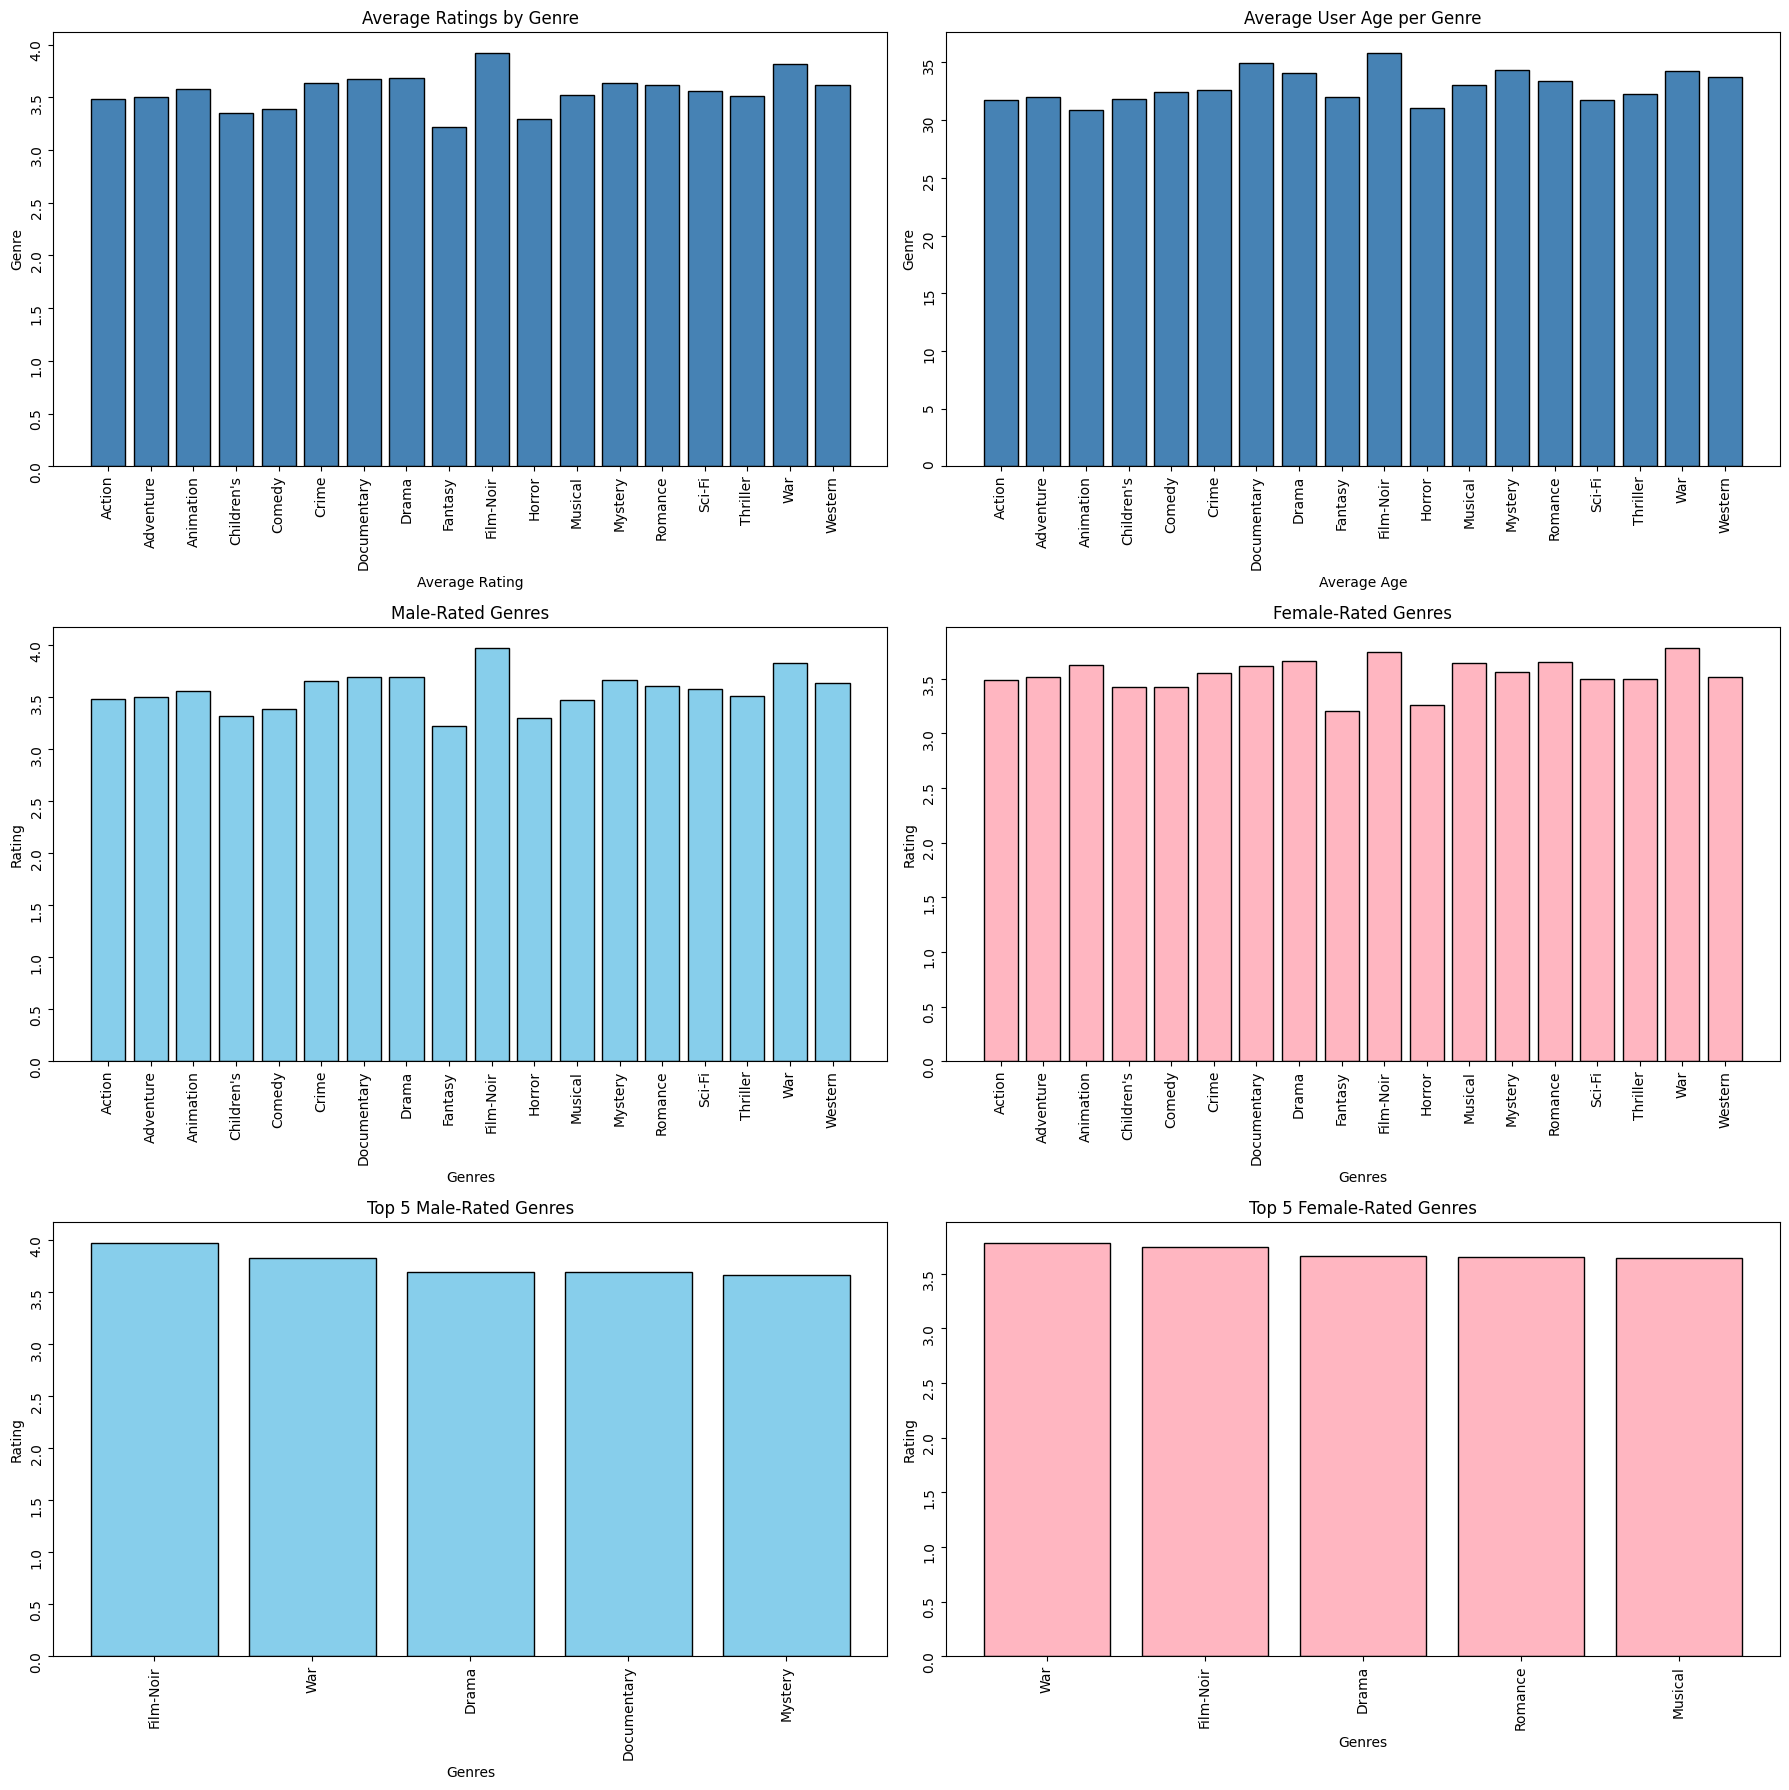

In [8]:
genre_columns = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 
                 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
                 'Sci-Fi', 'Thriller', 'War', 'Western']

fig, axes = plt.subplots(3, 2, figsize = (18,18))

# Average Ratings by Genre
genre_ratings = {}
for genre in genre_columns:
    genre_data = full_data[full_data[genre] == 1]
    genre_ratings[genre] = genre_data['rating'].mean()
genre_ratings = pd.Series(genre_ratings)
axes[0, 0].bar(genre_ratings.index, genre_ratings.values, color = 'steelblue', edgecolor = 'black')
axes[0, 0].set_title('Average Ratings by Genre')
axes[0, 0].set_xlabel('Average Rating')
axes[0, 0].set_ylabel('Genre')
axes[0, 0].tick_params(rotation = 90)

# Average Age by Genre
user_genre_data = full_data[['age'] + genre_columns]
avg_age_per_genre = {}
for genre in genre_columns:
    genre_data = user_genre_data[user_genre_data[genre] == 1]
    avg_age_per_genre[genre] = genre_data['age'].mean()
avg_age_per_genre = pd.Series(avg_age_per_genre)
axes[0, 1].bar(avg_age_per_genre.index, avg_age_per_genre.values, color = 'steelblue', edgecolor = 'black')
axes[0, 1].set_title('Average User Age per Genre')
axes[0, 1].set_xlabel('Average Age')
axes[0, 1].set_ylabel('Genre')
axes[0, 1].tick_params(rotation = 90)

# Genre Rating by Gender
male_data = full_data[full_data['gender'] == 'M']
female_data = full_data[full_data['gender'] == 'F']
male_genre_ratings = {}
female_genre_ratings = {}
for genre in genre_columns:
    male_genre_data = male_data[male_data[genre] == 1]
    male_genre_ratings[genre] = male_genre_data['rating'].mean()

    female_genre_data = female_data[female_data[genre] == 1]
    female_genre_ratings[genre] = female_genre_data['rating'].mean()

male_genre_ratings = pd.Series(male_genre_ratings)
female_genre_ratings = pd.Series(female_genre_ratings)
axes[1, 0].bar(male_genre_ratings.index, male_genre_ratings.values, color = 'skyblue', edgecolor = 'black')
axes[1, 0].set_title('Male-Rated Genres')
axes[1, 0].set_xlabel('Genres')
axes[1, 0].set_ylabel('Rating')
axes[1, 0].tick_params(rotation = 90)
axes[1, 1].bar(female_genre_ratings.index, female_genre_ratings.values, color = 'lightpink', edgecolor = 'black')
axes[1, 1].set_title('Female-Rated Genres')
axes[1, 1].set_xlabel('Genres')
axes[1, 1].set_ylabel('Rating')
axes[1, 1].tick_params(rotation = 90)

# Top 5 male-rated Genres & Top 5 female-rated Genres
top_5_male_genres = male_genre_ratings.sort_values(ascending = False).head(5)
top_5_female_genres = female_genre_ratings.sort_values(ascending = False).head(5)
axes[2, 0].bar(top_5_male_genres.index, top_5_male_genres.values, color = 'skyblue', edgecolor = 'black')
axes[2, 0].set_title('Top 5 Male-Rated Genres')
axes[2, 0].set_xlabel('Genres')
axes[2, 0].set_ylabel('Rating')
axes[2, 0].tick_params(rotation = 90)
axes[2, 1].bar(top_5_female_genres.index, top_5_female_genres.values, color = 'lightpink', edgecolor = 'black')
axes[2, 1].set_title('Top 5 Female-Rated Genres')
axes[2, 1].set_xlabel('Genres')
axes[2, 1].set_ylabel('Rating')
axes[2, 1].tick_params(rotation = 90)

plt.tight_layout()
plt.show()

<p>As observed earlier, the general rating tendency is high, and this trend is also reflected in the average ratings per genre. Additionally, the average user age across genres remains relatively consistent, suggesting that people from various age groups enjoy a wide range of genres. </p>

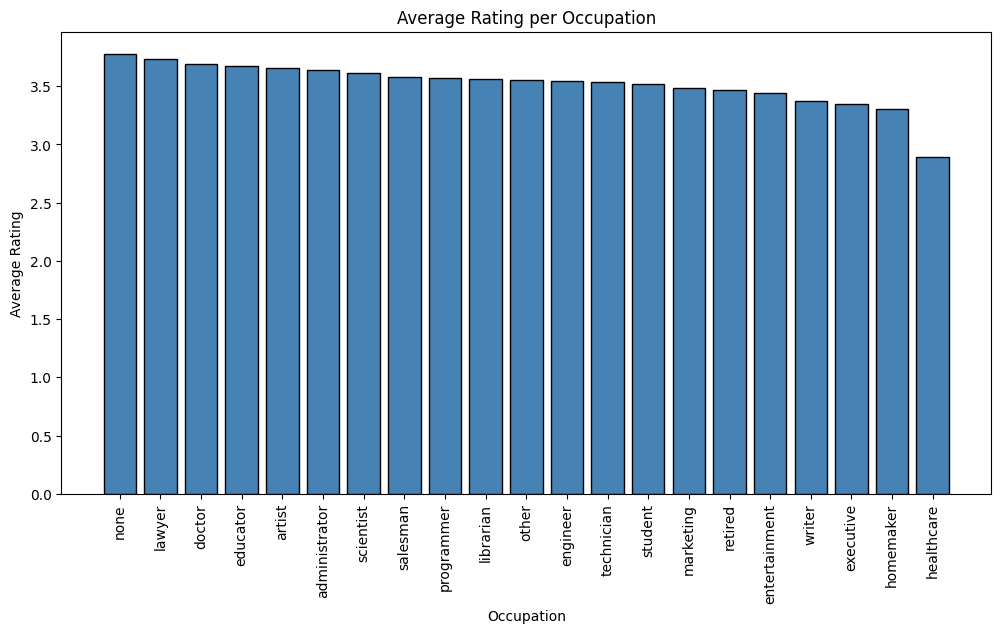

In [9]:
# Rating per occupation
occupation_ratings = full_data.groupby('occupation')['rating'].mean()
occupation_ratings = occupation_ratings.sort_values(ascending = False)
plt.figure(figsize = (12,6))
plt.bar(occupation_ratings.index, occupation_ratings.values, color = 'steelblue', edgecolor = 'black')
plt.title('Average Rating per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Rating')
plt.xticks(rotation = 90) 
plt.show()

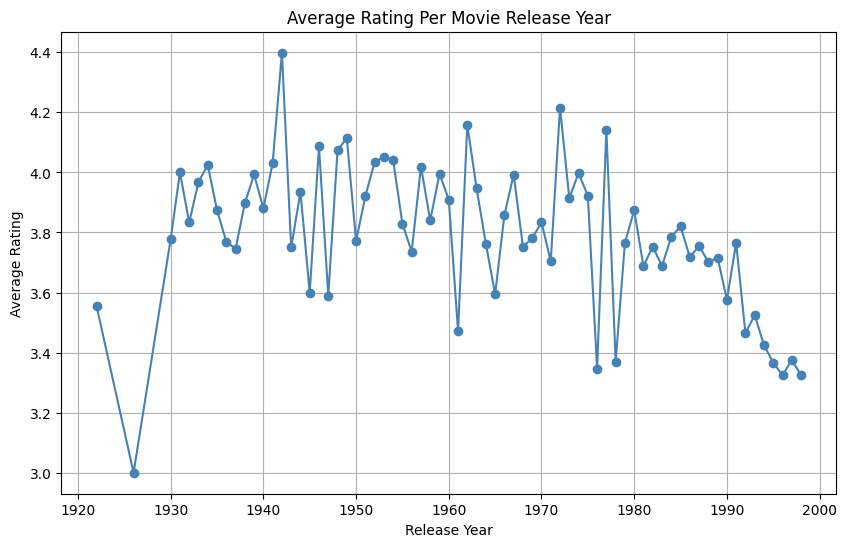

In [10]:
# Average Movie Rating per Year
full_data['release_date'] = pd.to_datetime(full_data['release_date'], errors = 'coerce')
full_data['release_year'] = full_data['release_date'].dt.year
average_rating_per_year = full_data.groupby('release_year')['rating'].mean().reset_index()
average_rating_per_year = average_rating_per_year.dropna()
plt.figure(figsize = (10,6))
plt.plot(average_rating_per_year['release_year'], average_rating_per_year['rating'], marker = 'o', color = 'steelblue')
plt.title('Average Rating Per Movie Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

<p>The average rating of movies seems to fluctuate quite a bit over the years. There are periods of high ratings followed by periods of lower ratings.</p>

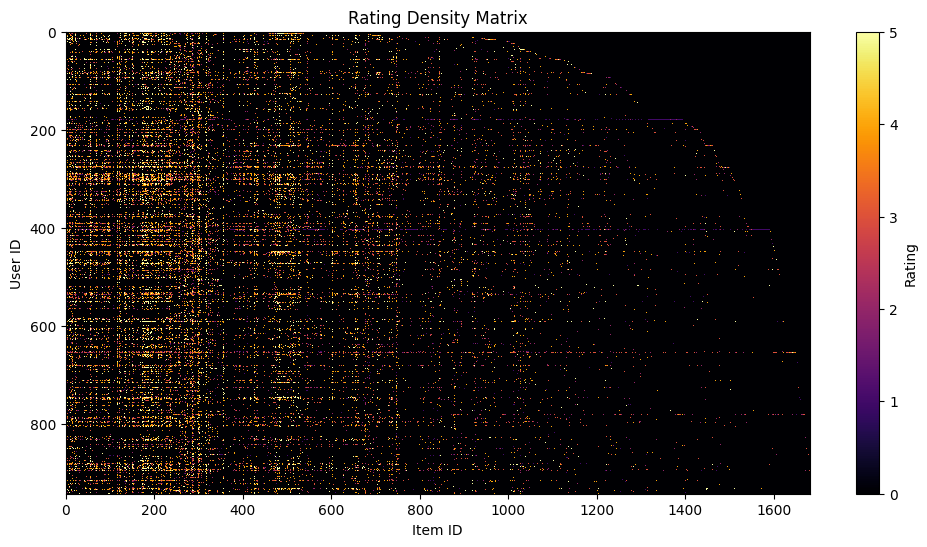

In [11]:
# Rating Matrix
rating_matrix = u_data.pivot_table(index = 'user_id', columns = 'item_id', values = 'rating')
plt.figure(figsize = (12,6))
plt.imshow(rating_matrix.fillna(0), cmap = 'inferno', aspect = 'auto', interpolation = 'none')
plt.colorbar(label = 'Rating')
plt.title('Rating Density Matrix')
plt.xlabel('Item ID')
plt.ylabel('User ID')
plt.show()

<p>The majority of the cells in the matrix are dark (representing 0), indicating that the dataset is sparse. This means that most users have rated only a small portion of the available items. The distribution of ratings is not uniform across the matrix, with certain areas showing higher concentrations of ratings. This suggests that some users and items are more popular than others, leading to a skewed rating patterns.</p>

<h4>Solution: $D_2$ (Wine Quality dataset)</h4>

In [12]:
wine = pd.read_csv('res/winequality-red.csv', sep = ';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


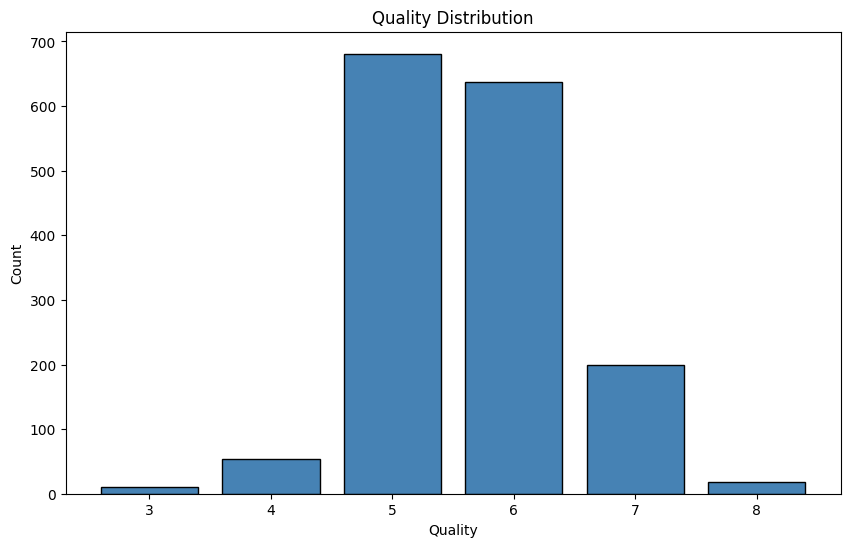

In [13]:
# Quality Distribution
quality_distribution = wine['quality'].value_counts()
plt.figure(figsize = (10,6))
plt.bar(quality_distribution.index, quality_distribution.values, color = 'steelblue', edgecolor = 'black')
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

<p>From the histogram, the unique values in the "quality" column range from 3 to 8, representing the wine quality ratings. The majority of wines have a quality rating between 5 and 6, which are the most dominant ratings in the dataset.</p>

In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


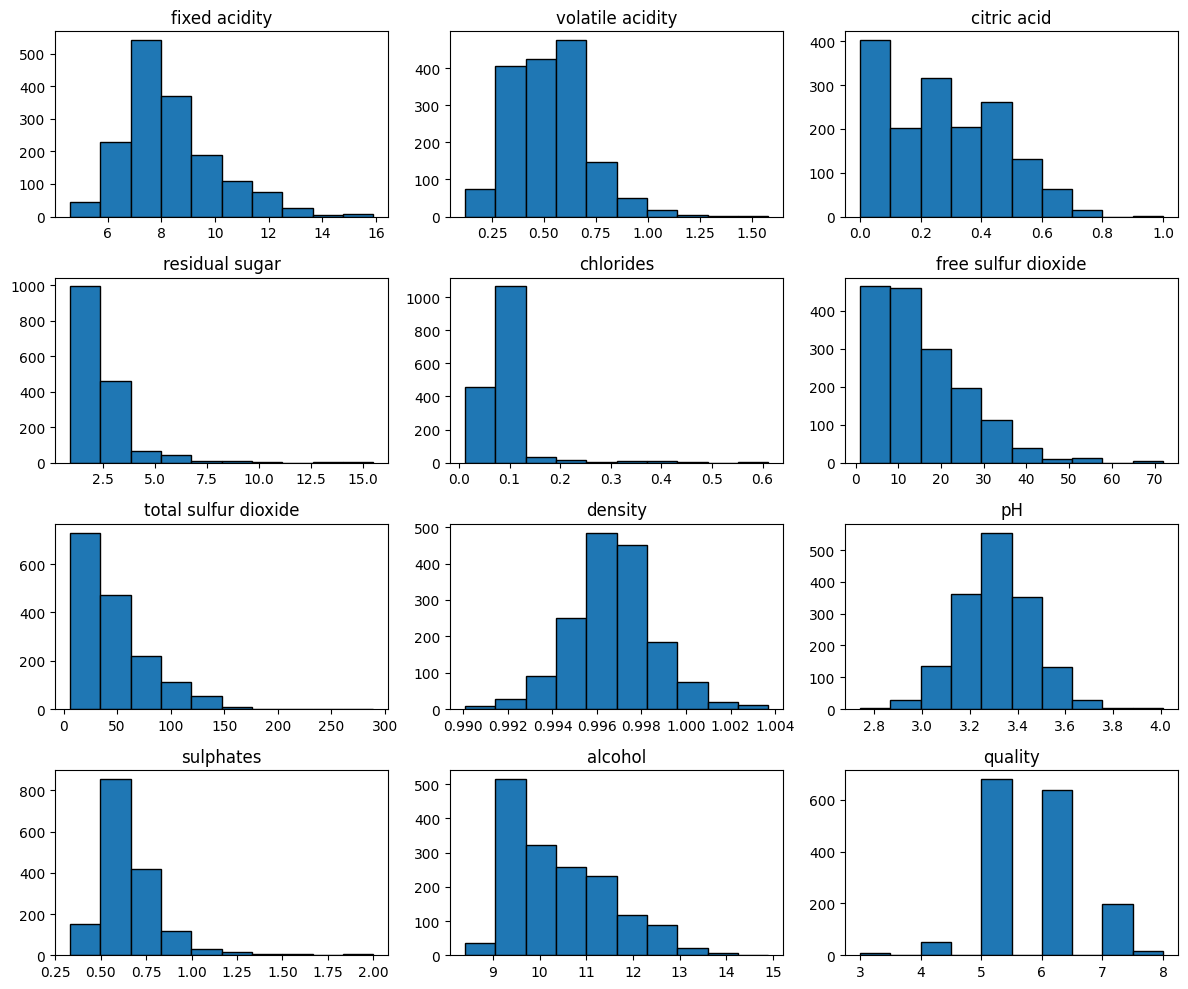

In [15]:
wine.hist(figsize = (12,10), grid = False, edgecolor = 'black')
plt.tight_layout()
plt.show()

<p>Most of the features do not really follow a normal distribution. </p>

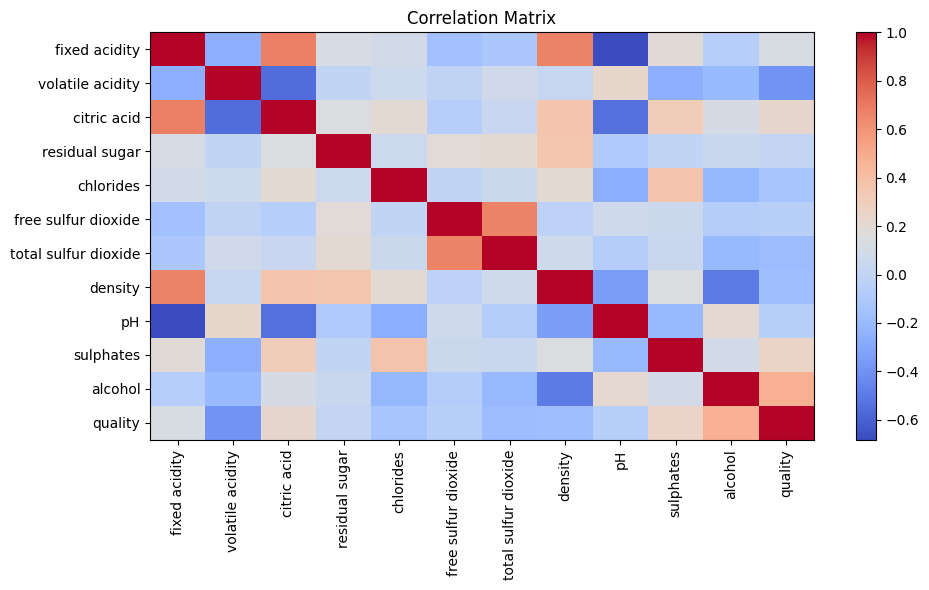

In [16]:
# Correlation
correlation_matrix = wine.corr()

plt.figure(figsize = (10,6))
plt.imshow(correlation_matrix, cmap = 'coolwarm', aspect = 'auto', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation = 90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<p>The analysis reveals a strong negative correlation between volatile acidity and wine quality, suggesting that wines with lower volatile acidity are generally perceived to be of higher quality. On the other hand, there is a moderate positive correlation between alcohol content and quality, implying that wines with higher alcohol levels tend to be rated as higher quality.</p>

<h3>Question 2 - Implement Basic Matrix Factorization Technique for Recommender Systems</h3>
<p>In this task, you are required to implement a matrix factorization (MF) technique for recommender systems. You are given a rating matrix $R_{n \times m}$ and must learn latent matrices $P_{n \times k}$ and $Q_{m \times k}$, where $n$ is the number of latent dimensions. You can solve the MF problem by implementing Stochastic Gradient Descent (SGD), Alternating Least Squares (ALS), or Coordinate Descent (CD) learning algorithms. Follow a 3-fold cross-validation protocol with train, validation, and test data splits. Measure the prediction quality using the RMSE score on the test datset.</p>
<ul>
    <li>Normalize your data</li>
    <li>Optimize the hyperparameters, i.e., $\lambda$ (regularization constant), $\alpha$ (learning rate), and $k$ (latent dimensions)</li>
    <li>Compute the test RMSE (averaged across the 3 folds).</li>
</ul>

<h4>Solution:</h4>
<p>Sources: </p>
<ul>
    <li>https://www.ismll.uni-hildesheim.de/lehre/bd-16s/script/bd-09-parallel-mf.pdf</li>
    <li>https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetflix%5D.pdf</li>
    <li>https://github.com/albertauyeung/matrix-factorization-in-python</li>
</ul>

<h4>Data preparation / normalization</h4>
<p>First, we will adjust the user_ids and movie_ids by subtracting 1 to enable zero-based indexing, which is suitable for computational purposes. Next, we will normalize the ratings and construct a list of tuples, with each tuple containing the user_id, movie_id, and normalized rating. Finally, we will calculate N (the total number of unique users) and M (the total number of unique movies).</p>

In [17]:
data = pd.read_csv('res/u.data', sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])

# For indexing
data['user_id'] -= 1
data['item_id'] -= 1

# Rating Normalization
data['rating'] = (data['rating'] - data['rating'].min()) / (data['rating'].max() - data['rating'].min())

data = list(zip(data['user_id'], data['item_id'], data['rating']))
N = len(u_user)
M = len(u_info)

<h4>SGD Matrix Factorization</h4>

<p>Given the complexity of the task, I decided to implement a Python class, SGD_MF, to perform matrix factorization. Stochastic Gradient Descent (SGD) was chosen to solve the matrix factorization problem because it has been extensively used in prior tasks, providing familiarity and reliability. Additionally, Task 3 employs coordinate descent, offering a point of comparison between the two approaches.</p>
<p>The SGD_MF class includes the following methods:</p>
<ul>
    <li>fit: Trains the model using the provided data.</li>
    <li>predict(sample): Generates a predicted rating for a specified sample of user_ids and movie_ids.
</li>
    <li>rmse(sample): Computes the root mean square error (RMSE) for a given sample.
</li>
</ul>

In [18]:
class SGD_MF:
    
    def __init__(self, samples, N, M, K, alpha, lamb, T):
        """
        Arguments:
        - samples (list) : tuples containing user_id, movie_id and rating
        - N (int)        : number of users
        - M (int)        : number of movies
        - alpha (flo at)  : learning rate
        - lamb (float)   : regularization parameter
        - T (int)        : amount of epochs
        """
        
        self.samples = samples
        self.N = N
        self.M = M
        self.K = K
        self.alpha = alpha
        self.lamb = lamb
        self.T = T
        
    def fit(self):
        self.W = np.random.normal(scale = 1. / self.K, size = (self.N, self.K))
        self.H = np.random.normal(scale = 1. / self.K, size = (self.M, self.K))

        self.b_n = np.zeros(self.N)
        self.b_m = np.zeros(self.M)
        self.b = sum(y for _, _, y in self.samples) / len(self.samples)

        for t in range(self.T):
            np.random.shuffle(self.samples)

            for n, m, y in self.samples:

                # Error
                prediction = self.predict(n, m)
                e = y - prediction

                # Update biases
                self.b_n[n] += self.alpha * (e - self.lamb * self.b_n[n])
                self.b_m[m] += self.alpha * (e - self.lamb * self.b_m[m])

                # Update latent feature matrices
                W_n = self.W[n, :][:]
                self.W[n, :] += self.alpha * (e * self.H[m, :] - self.lamb * self.W[n, :])
                self.H[m, :] += self.alpha * (e * W_n - self.lamb * self.H[m, :])

    def predict(self, n, m):
        prediction = self.b + self.b_n[n] + self.b_m[m] + self.W[n, :] @ self.H[m, :].T
        return prediction

    def rmse(self, sample):
        y_true = []
        y_prediction = []
        
        for n, m, y in sample:
            y_prediction.append(self.predict(n, m))
            y_true.append(y)
            
        y_true = np.array(y_true)
        y_prediction = np.array(y_prediction)

        rmse = np.sqrt(np.mean((y_true - y_prediction) ** 2))
        return rmse

<h4>3-fold cross-validation</h4>

<p>Since the task requires a 3-fold cross-validation protocol involving train, validation, and test data splits, I decided to split the dataset into 80% for training and 20% for testing. Within the training data, we perform 3-fold cross-validation, where the training data is further divided into training and validation subsets for each fold. During each fold, the model is trained on the training subset and validated using the validation subset to compute the RMSE at the end of the fold.

After completing all folds, we calculate the average RMSE scores obtained on the validation subsets. The best hyperparameter combination is selected based on the lowest average RMSE. Finally, we train the model using the best hyperparameters on the entire training set and compare the RMSE on the training data with the RMSE on the test data.</p>

In [19]:
partition = int(len(data) * 0.8)
train_data, test_data = data[:partition], data[partition:]

In [20]:
def k_fold_cv(data, Ks, alphas, lambdas, T = 100, k = 3):

    np.random.shuffle(data)
    fold_size = len(data) // k
    folds = [data[i : i + fold_size] for i in range(0, len(data), fold_size)]
    
    best_rmse = float('inf')
    best_params = None

    for lamb in lambdas:
        for alpha in alphas:
            for K in Ks:
                print(f'K: {K:<3} | alpha: {alpha:<7.5f} | lambda: {lamb:<7.5f}')
                fold_rmse = []
                
                for i in range(k):
                    val_data = folds[i]
                    train_data = [item for j in range(k) if j != i for item in folds[j]]
                    
                    model = SGD_MF(train_data, N, M, K, alpha, lamb, T)
                    model.fit()
                    
                    rmse = model.rmse(val_data) 
                    fold_rmse.append(rmse)

                avg_rmse = np.mean(fold_rmse)

                if avg_rmse < best_rmse:
                    best_rmse = avg_rmse
                    best_params = (K, alpha, lamb)

    print(f'Best Parameters: {best_params} | RMSE: {best_rmse}')
    return best_params, best_rmse

In [21]:
Ks = [10, 15, 20]
lambdas = [0.01, 0.001]
learning_rates = [0.01, 0.001]

best_params, best_rmse = k_fold_cv(train_data, Ks, lambdas, learning_rates)

K: 10  | alpha: 0.01000 | lambda: 0.01000
K: 15  | alpha: 0.01000 | lambda: 0.01000
K: 20  | alpha: 0.01000 | lambda: 0.01000
K: 10  | alpha: 0.00100 | lambda: 0.01000
K: 15  | alpha: 0.00100 | lambda: 0.01000
K: 20  | alpha: 0.00100 | lambda: 0.01000
K: 10  | alpha: 0.01000 | lambda: 0.00100
K: 15  | alpha: 0.01000 | lambda: 0.00100
K: 20  | alpha: 0.01000 | lambda: 0.00100
K: 10  | alpha: 0.00100 | lambda: 0.00100
K: 15  | alpha: 0.00100 | lambda: 0.00100
K: 20  | alpha: 0.00100 | lambda: 0.00100
Best Parameters: (20, 0.001, 0.01) | RMSE: 0.23787873097564852


In [22]:
best_K = best_params[0]
best_alpha = best_params[1]
best_lamb = best_params[2]

model = SGD_MF(train_data, N, M, best_K, best_alpha, best_lamb, T = 100)
model.fit()

sgd_train_data_rmse = model.rmse(train_data)
sgd_test_data_rmse = model.rmse(test_data)

In [23]:
print(f"RMSE (Training data): {sgd_train_data_rmse}")
print(f"RMSE (Test data): {sgd_test_data_rmse}")

RMSE (Training data): 0.22767956958308486
RMSE (Test data): 0.23453732094836086


<p>The closeness of the training and test RMSE values indicates that the model generalizes well to unseen data. The slightly higher RMSE on the test data is expected, as the model is evaluated on data it was not exposed to during training. This small difference demonstrates that the model avoids overfitting to the training data and maintains strong predictive accuracy on new samples.

However, it is worth noting that the convergence of the model requires significant computational time. This could be due to the complexity of the optimization process or the size of the dataset.</p>

<h3>Question 3 - Recommender Systems Using Matrix Factorization Libraries</h3>
<p>In this task, you are required to use off-the-shelf libraries such as libmf or scikit-learn. Learn
a matrix factorization model using the coordinate descent method. Optimize the hyperparameters and perform a 3-fold cross-validation. Compare your results with those obtained in Exercise
2. List in detail which libraries were used, what they solve, and why they were selected. Present
your results in the form of plots and tables.</p>

In [24]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV 
from sklearn.decomposition import NMF 

<ul>
    <li>mean_squared_error (sklearn.metrics): For our rmse_scorer function, we will utilize the mean_squared_error function provided by scikit-learn. While it is technically possible to implement this easy calculation manually, i decided to use the library implementation for convenience :)</li>
    <br>
    <li>GridSearchCV (sklearn.model_selection): We use GridSearchCV for k-fold cross-validation (in this case 3-fold cross-validation) because it enables systematic hyperparameter tuning while simultaneously ensuring robust model evaluation through cross-validation. This results in a model with well-optimized hyperparameters that generalizes effectively to new data.</li>
    <br>
    <li>NMF (sklearn.decomposition): Since our rating matrix consists only of positive values, we will use Non-Negative Matrix Factorization (NMF). This method factorizes our user-rating matrix into two non-negative matrices: one representing user features and the other representing movie features. Additionally, NMF provides a choice between different solvers for optimization, such as coordinate descent and multiplicative update. For this task, we will use the coordinate descent solver, as the task specifically requires this approach for optimization.</li>
</ul>

In [26]:
data = pd.read_csv('res/u.data', sep = '\t', names = ['user_id', 'item_id', 'rating', 'timestamp'])
data['user_id'] -= 1
data['item_id'] -= 1

data = list(zip(data['user_id'], data['item_id'], data['rating']))
N = len(u_user)
M = len(u_info)

partition = int(len(data) * 0.8)
train_data, test_data = data[:partition], data[partition:]

In [27]:
train_user_item_matrix = np.zeros((N, M))
for user_id, movie_id, rating in train_data:
    train_user_item_matrix[int(user_id), int(movie_id)] = rating

test_user_item_matrix = np.zeros((N, M))
for user_id, movie_id, rating in test_data:
    test_user_item_matrix[int(user_id), int(movie_id)] = rating

In [28]:
model = NMF(solver = 'cd', max_iter = 2500)

param_grid = {
    'n_components': [10, 15, 20],  # K
    'alpha_W': [0.001, 0.01, 0.1],  # Regularization W
    'alpha_H': [0.001, 0.01, 0.1] # Regularization H
}

def rmse_scorer(estimator, X):
    W = estimator.transform(X)
    H = estimator.components_
    reconstructed = W @ H
    mask = X != 0
    rmse = np.sqrt(np.mean((X[mask] - reconstructed[mask]) ** 2))
    return rmse

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = rmse_scorer,
    cv = 3,
    n_jobs=-1
)

grid_search.fit(train_user_item_matrix)

# NRMSE = RMSE / (ymax - ymin)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'RMSE: {grid_search.best_score_ / 4}')

Best Parameters: {'alpha_H': 0.1, 'alpha_W': 0.1, 'n_components': 20}
RMSE: 0.7554750766836777


In [29]:
alpha_H = grid_search.best_params_['alpha_H']
alpha_W = grid_search.best_params_['alpha_W']
n_components = grid_search.best_params_['n_components']

model = NMF(solver = 'cd', max_iter = 1000, n_components = n_components, alpha_H = alpha_H, alpha_W = alpha_W)
W = model.fit_transform(train_user_item_matrix)
H = model.components_

def calculate_rmse(X):
    reconstructed = W @ H
    mask = X != 0
    rmse = np.sqrt(np.mean((X[mask] - reconstructed[mask]) ** 2))
    return rmse

cd_train_data_rmse = calculate_rmse(train_user_item_matrix)
cd_test_data_rmse = calculate_rmse(test_user_item_matrix)

# NRMSE = RMSE / (ymax - ymin)
print(f'RMSE (Training data): {cd_train_data_rmse / 4}')
print(f'RMSE (Test data): {cd_test_data_rmse / 4}')

RMSE (Training data): 0.7452618202730749
RMSE (Test data): 0.7865794153616701


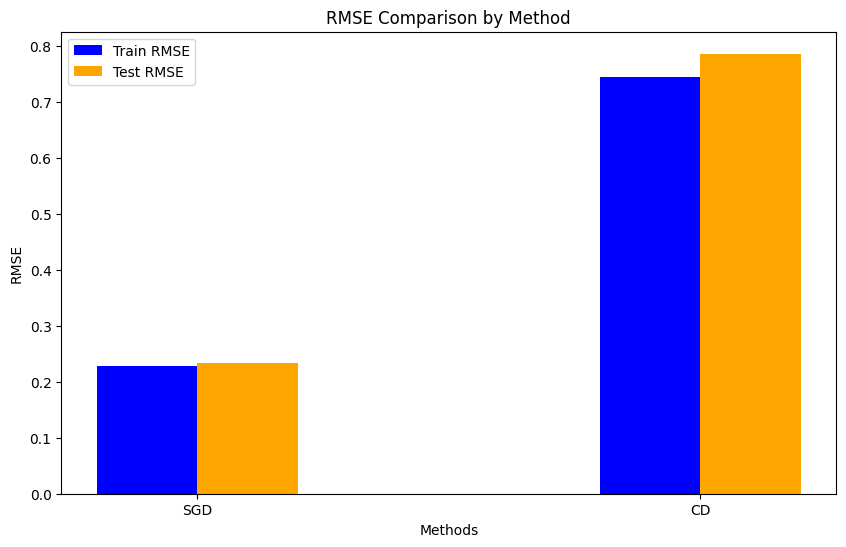

In [30]:
labels = ['SGD', 'CD']
x = np.arange(len(labels))

# NRMSE = RMSE / (ymax - ymin)
train_data = [sgd_train_data_rmse, cd_train_data_rmse / 4]
test_data = [sgd_test_data_rmse, cd_test_data_rmse / 4]

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2 / 2, train_data, width = 0.2, label = 'Train RMSE', color = 'blue')
plt.bar(x + 0.2 / 2, test_data, width = 0.2, label = 'Test RMSE', color = 'orange')
plt.xlabel('Methods')
plt.ylabel('RMSE')
plt.title('RMSE Comparison by Method')
plt.xticks(x, labels)
plt.legend()
plt.show()

<p>As observed, our SGD method outperforms the Non-Negative Matrix Factorization (NNMF) with the Coordinate Descent solver from scikit-learn. This difference in performance can likely be attributed to the nature and size of the dataset we are working with. Given that we are handling a substantial amount of data, the Stochastic Gradient Descent (SGD) method, despite its computational expense—especially when combined with k-fold cross-validation—provides more accurate and reliable results.</p>